In [ ]:
from google.colab import drive
drive.flush_and_unmount()

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install --quiet cornac==1.6.1

     |████████████████████████████████| 10.1MB 6.4MB/s 


In [ ]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
final_dataset_withoutS2V = pd.read_csv (r'/content/drive/My Drive/Recommender Systems/Data/final_dataset_withouStyle2Vec.csv')
final_dataset_withoutS2V.shape

(278677, 9)

In [ ]:
final_dataset_withoutS2V.head()

,Unnamed: 0,user_id,item_id,rating,categories,title,description,brand,price
0,0,A1KLRMWW2FWPL4,0000031887,5.0,"['Clothing', 'Shoes & Jewelry', 'Girls', 'Acti...",Ballet Dress-Up Fairy Tutu,This adorable basic ballerina tutu is perfect ...,Boutique Cutie,6.79
1,1,A2G5TCU2WDFZ65,0000031887,5.0,"['Clothing', 'Shoes & Jewelry', 'Girls', 'Acti...",Ballet Dress-Up Fairy Tutu,This adorable basic ballerina tutu is perfect ...,Boutique Cutie,6.79
2,2,A1RLQXYNCMWRWN,0000031887,5.0,"['Clothing', 'Shoes & Jewelry', 'Girls', 'Acti...",Ballet Dress-Up Fairy Tutu,This adorable basic ballerina tutu is perfect ...,Boutique Cutie,6.79
3,3,A8U3FAMSJVHS5,0000031887,5.0,"['Clothing', 'Shoes & Jewelry', 'Girls', 'Acti...",Ballet Dress-Up Fairy Tutu,This adorable basic ballerina tutu is perfect ...,Boutique Cutie,6.79
4,4,A3GEOILWLK86XM,0000031887,5.0,"['Clothing', 'Shoes & Jewelry', 'Girls', 'Acti...",Ballet Dress-Up Fairy Tutu,This adorable basic ballerina tutu is perfect ...,Boutique Cutie,6.79


In [ ]:
df_amazon_embedding = pd.read_pickle(r'/content/drive/My Drive/Recommender Systems/Data/df_amazon_embed.pkl')

df_amazon_embedding.rename(columns = {'productid':'item_id'}, inplace = True) 
df_amazon_embedding.head()

,embedding,item_id
0,"[0.10463765, 0.0028498974, 0.0023347605, 0.136...",B002QHWDXC
1,"[0.047843404, 0.009755734, 0.0014466671, 0.007...",B0059DL7O6
2,"[0.20428646, 0.040360656, 0.0, 0.06415812, 0.0...",B007HDSCTE
3,"[0.030448493, 0.23888844, 0.033102844, 0.04972...",B00AAMOH2K
4,"[0.12423585, 0.030314209, 0.0701552, 0.0584869...",B000V5XCUO


In [ ]:
num = df_amazon_embedding.to_numpy()

In [ ]:
num.shape

(23033, 2)

In [ ]:
features_s2v = num[:,0]

In [ ]:
features_s2v

array([array([0.10463765, 0.0028499 , 0.00233476, ..., 0.        , 0.        ,
       0.        ], dtype=float32),
       array([0.0478434 , 0.00975573, 0.00144667, ..., 0.        , 0.        ,
       0.        ], dtype=float32),
       array([0.20428646, 0.04036066, 0.        , ..., 0.00561307, 0.        ,
       0.        ], dtype=float32),
       ...,
       array([0.03331942, 0.19572993, 0.04809602, ..., 0.2809054 , 0.0858346 ,
       0.17726995], dtype=float32),
       array([0.07662067, 0.02135233, 0.        , ..., 0.00881171, 0.02164594,
       0.00108133], dtype=float32),
       array([0.02988712, 0.17056175, 0.0197693 , ..., 0.42163265, 0.16697879,
       0.08755049], dtype=float32)], dtype=object)

In [ ]:
features2 = np.stack( features_s2v, axis=0 )

In [ ]:
item_ids2 = num[:,1]

In [ ]:
full_df = pd.merge(final_dataset_withoutS2V, df_amazon_embedding, on='item_id', how='outer')
full_df = full_df.drop(full_df.columns[0], axis=1)

full_df.head(20)

,Unnamed: 0,user_id,item_id,rating,categories,title,description,brand,price,embedding
0,0,A1KLRMWW2FWPL4,0000031887,5.0,"['Clothing', 'Shoes & Jewelry', 'Girls', 'Acti...",Ballet Dress-Up Fairy Tutu,This adorable basic ballerina tutu is perfect ...,Boutique Cutie,6.79,"[0.06690815, 0.0131465085, 0.00455577, 0.12448..."
1,1,A2G5TCU2WDFZ65,0000031887,5.0,"['Clothing', 'Shoes & Jewelry', 'Girls', 'Acti...",Ballet Dress-Up Fairy Tutu,This adorable basic ballerina tutu is perfect ...,Boutique Cutie,6.79,"[0.06690815, 0.0131465085, 0.00455577, 0.12448..."
2,2,A1RLQXYNCMWRWN,0000031887,5.0,"['Clothing', 'Shoes & Jewelry', 'Girls', 'Acti...",Ballet Dress-Up Fairy Tutu,This adorable basic ballerina tutu is perfect ...,Boutique Cutie,6.79,"[0.06690815, 0.0131465085, 0.00455577, 0.12448..."
3,3,A8U3FAMSJVHS5,0000031887,5.0,"['Clothing', 'Shoes & Jewelry', 'Girls', 'Acti...",Ballet Dress-Up Fairy Tutu,This adorable basic ballerina tutu is perfect ...,Boutique Cutie,6.79,"[0.06690815, 0.0131465085, 0.00455577, 0.12448..."
4,4,A3GEOILWLK86XM,0000031887,5.0,"['Clothing', 'Shoes & Jewelry', 'Girls', 'Acti...",Ballet Dress-Up Fairy Tutu,This adorable basic ballerina tutu is perfect ...,Boutique Cutie,6.79,"[0.06690815, 0.0131465085, 0.00455577, 0.12448..."
5,5,A27UF1MSF3DB2,0000031887,4.0,"['Clothing', 'Shoes & Jewelry', 'Girls', 'Acti...",Ballet Dress-Up Fairy Tutu,This adorable basic ballerina tutu is perfect ...,Boutique Cutie,6.79,"[0.06690815, 0.0131465085, 0.00455577, 0.12448..."
6,6,A16GFPNVF4Y816,0000031887,5.0,"['Clothing', 'Shoes & Jewelry', 'Girls', 'Acti...",Ballet Dress-Up Fairy Tutu,This adorable basic ballerina tutu is perfect ...,Boutique Cutie,6.79,"[0.06690815, 0.0131465085, 0.00455577, 0.12448..."
7,7,A2M2APVYIB2U6K,0000031887,5.0,"['Clothing', 'Shoes & Jewelry', 'Girls', 'Acti...",Ballet Dress-Up Fairy Tutu,This adorable basic ballerina tutu is perfect ...,Boutique Cutie,6.79,"[0.06690815, 0.0131465085, 0.00455577, 0.12448..."
8,8,A1NJ71X3YPQNQ9,0000031887,4.0,"['Clothing', 'Shoes & Jewelry', 'Girls', 'Acti...",Ballet Dress-Up Fairy Tutu,This adorable basic ballerina tutu is perfect ...,Boutique Cutie,6.79,"[0.06690815, 0.0131465085, 0.00455577, 0.12448..."
9,9,A3EERSWHAI6SO,0000031887,5.0,"['Clothing', 'Shoes & Jewelry', 'Girls', 'Acti...",Ballet Dress-Up Fairy Tutu,This adorable basic ballerina tutu is perfect ...,Boutique Cutie,6.79,"[0.06690815, 0.0131465085, 0.00455577, 0.12448..."


In [ ]:
# full_df.to_pickle('/content/drive/My Drive/Recommender Systems/Data/final_dataset_merged_S2V.pkl')


EDA

In [ ]:
full_df["user_id"].describe()

count             278677
unique             39387
top       A2J4XMWKR8PPD0
freq                 136
Name: user_id, dtype: object

In [ ]:
full_df["item_id"].describe()

count         278677
unique         23033
top       B005LERHD8
freq             441
Name: item_id, dtype: object

In [ ]:
full_df["rating"].describe()

count    278677.000000
mean          4.245133
std           1.103747
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

In [ ]:
full_df["categories"].describe()

count                                                278677
unique                                                 6073
top       ['Clothing', 'Shoes & Jewelry', 'Women', 'Tops...
freq                                                   4484
Name: categories, dtype: object

In [ ]:
full_df["title"].describe()

count                                                278551
unique                                                22799
top       Vintage, Retro Colorful Crystal Owl Pendant an...
freq                                                    441
Name: title, dtype: object

In [ ]:
full_df["description"].describe()

count                                                 38927
unique                                                 3500
top       JewelrieShop no-metal-stamp (Fashion only) Bas...
freq                                                    441
Name: description, dtype: object

In [ ]:
full_df["brand"].describe()

count     179034
unique      2764
top       Clarks
freq        3153
Name: brand, dtype: object

In [ ]:
full_df["price"].describe()

count    164672.000000
mean         32.499115
std          42.831479
min           0.010000
25%          10.000000
50%          20.000000
75%          39.000000
max        1030.490000
Name: price, dtype: float64

In [ ]:
df_uir = full_df[['user_id', 'item_id', 'rating']]


In [ ]:
df_uir.head()

,user_id,item_id,rating
0,A1KLRMWW2FWPL4,0000031887,5.0
1,A2G5TCU2WDFZ65,0000031887,5.0
2,A1RLQXYNCMWRWN,0000031887,5.0
3,A8U3FAMSJVHS5,0000031887,5.0
4,A3GEOILWLK86XM,0000031887,5.0


In [ ]:
df_uir.to_csv (r'./df_uir.csv', index = None, header=True) 

In [ ]:
import os
import sys

import cornac
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, sparse

%matplotlib inline

from cornac.data import Reader
from cornac.eval_methods import BaseMethod
from cornac.eval_methods import RatioSplit
from cornac.eval_methods import CrossValidation

from cornac.models import MF ,BPR, WMF, WBPR, IBPR, NeuMF, VAECF
from cornac.metrics import MAE, RMSE
from cornac.utils import cache

from collections import defaultdict

from cornac.hyperopt import Discrete, Continuous
from cornac.hyperopt import GridSearch, RandomSearch



%tensorflow_version 1.x
import tensorflow as tf

print(f"System version: {sys.version}")
print(f"Cornac version: {cornac.__version__}")
print(f"Tensorflow version: {tf.__version__}")


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


TensorFlow 1.x selected.
System version: 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
Cornac version: 1.6.1
Tensorflow version: 1.15.2


In [ ]:
reader = Reader()
ratings = reader.read(fpath='./df_uir.csv', fmt='UIR', sep=',', skip_lines=1)
test_ratings = reader.read(fpath='./df_uir.csv', fmt='UIR', sep=',', skip_lines=1)


data = pd.read_csv("./df_uir.csv") 

df_model = pd.DataFrame(data, columns=["user_id", "item_id", "rating"])
df_model.head()


,user_id,item_id,rating
0,A1KLRMWW2FWPL4,0000031887,5.0
1,A2G5TCU2WDFZ65,0000031887,5.0
2,A1RLQXYNCMWRWN,0000031887,5.0
3,A8U3FAMSJVHS5,0000031887,5.0
4,A3GEOILWLK86XM,0000031887,5.0


In [ ]:
print(f"Number of ratings: {len(df_uir)}")
print(f"Number of users: {df_uir.user_id.nunique()}")
print(f"Number of items: {df_uir.item_id.nunique()}")

n_users = df_uir.user_id.nunique()
n_items = df_uir.item_id.nunique()
n_ratings = len(df_uir)
rating_matrix_size = n_users * n_items
sparsity = 1 - n_ratings / rating_matrix_size

print(f"Number of users: {n_users}")
print(f"Number of items: {n_items}")
print(f"Number of available ratings: {n_ratings}")
print(f"Number of all possible ratings: {rating_matrix_size}")
print("-" * 40)
print(f"SPARSITY: {sparsity * 100.0:.2f}%")


Number of ratings: 278677
Number of users: 39387
Number of items: 23033
Number of users: 39387
Number of items: 23033
Number of available ratings: 278677
Number of all possible ratings: 907200771
----------------------------------------
SPARSITY: 99.97%


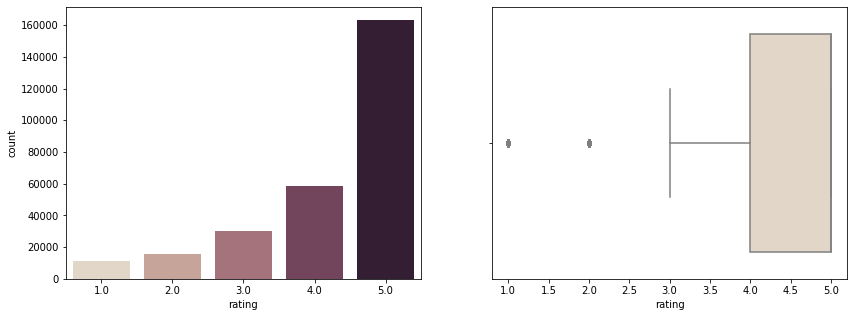

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
sns.countplot(x="rating", data=df_uir, palette="ch:.25", ax=axes[0])
sns.boxplot(x="rating", data=df_uir, palette="ch:.25", ax=axes[1])

In [ ]:
cross_eval = cornac.eval_methods.cross_validation.CrossValidation(data=ratings, n_folds=5, rating_threshold=0.5, seed=123, exclude_unknowns=False, verbose=True)


mf = MF(k=50, max_iter=20, learning_rate=0.01, lambda_reg=0.0, use_bias=False, verbose=True, seed=123)
bpr = cornac.models.BPR(k=10, max_iter=200, learning_rate=0.001, lambda_reg=0.01, seed=123)

wmf = cornac.models.WMF(k=50, max_iter=50, learning_rate=0.001, lambda_u=0.01, lambda_v=0.01, verbose=True, seed=123)
wbpr = cornac.models.WBPR(k=50, max_iter=200, learning_rate=0.001, lambda_reg=0.001, verbose=True)

vaecf = cornac.models.VAECF(k=10,autoencoder_structure=[20],act_fn="tanh", likelihood="mult", n_epochs=100, batch_size=100, learning_rate=0.001, beta=1.0, seed=123, use_gpu=True,verbose=True,)
neumf1 = cornac.models.NeuMF(num_factors=8, layers=[64, 32, 16, 8], act_fn="tanh",learner="adam",num_epochs=10,batch_size=256,lr=0.001,num_neg=50,seed=123,)



rmse = cornac.metrics.RMSE()
recall = cornac.metrics.Recall(k=50)
ndcg = cornac.metrics.NDCG(k=50)
ncrr = cornac.metrics.NCRR(k=50)
mae = cornac.metrics.MAE()
prec = cornac.metrics.Precision(k=50)
auc = cornac.metrics.AUC()
f1 = cornac.metrics.FMeasure(k=50)


cornac.Experiment(
  cross_eval,
  models=[mf, bpr, wmf, wbpr, vaecf, neumf1],
  metrics=[auc, ncrr, ndcg, recall, mae, rmse, prec, f1],
  user_based=True
).run()

rating_threshold = 0.5
exclude_unknowns = False
Fold: 1
---
Training data:
Number of users = 39379
Number of items = 23033
Number of ratings = 222942
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29913
Number of items = 19125
Number of ratings = 55735
Number of unknown users = 8
Number of unknown items = 0
---
Validation data:
Number of users = 29913
Number of items = 19125
Number of ratings = 55735
---
Total users = 39387
Total items = 23033

[MF] Training started!



Optimization finished!

[MF] Evaluation started!



Fold: 2
---
Training data:
Number of users = 39383
Number of items = 23032
Number of ratings = 222941
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29840
Number of items = 19040
Number of ratings = 55736
Number of unknown users = 4
Number of unknown items = 1
---
Validation data:
Number of users = 29840
Number of items = 19040
Number of ratings = 55736
---
Total users = 39387
Total items = 23033

[MF] Training started!



Optimization finished!

[MF] Evaluation started!



Fold: 3
---
Training data:
Number of users = 39383
Number of items = 23029
Number of ratings = 222942
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29864
Number of items = 19036
Number of ratings = 55735
Number of unknown users = 4
Number of unknown items = 4
---
Validation data:
Number of users = 29864
Number of items = 19036
Number of ratings = 55735
---
Total users = 39387
Total items = 23033

[MF] Training started!



Optimization finished!

[MF] Evaluation started!



Fold: 4
---
Training data:
Number of users = 39383
Number of items = 23029
Number of ratings = 222942
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29950
Number of items = 18992
Number of ratings = 55735
Number of unknown users = 4
Number of unknown items = 4
---
Validation data:
Number of users = 29950
Number of items = 18992
Number of ratings = 55735
---
Total users = 39387
Total items = 23033

[MF] Training started!



Optimization finished!

[MF] Evaluation started!



Fold: 5
---
Training data:
Number of users = 39384
Number of items = 23033
Number of ratings = 222941
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29837
Number of items = 19017
Number of ratings = 55736
Number of unknown users = 3
Number of unknown items = 0
---
Validation data:
Number of users = 29837
Number of items = 19017
Number of ratings = 55736
---
Total users = 39387
Total items = 23033

[MF] Training started!



Optimization finished!

[MF] Evaluation started!



Fold: 1
---
Training data:
Number of users = 39379
Number of items = 23033
Number of ratings = 222942
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29913
Number of items = 19125
Number of ratings = 55735
Number of unknown users = 8
Number of unknown items = 0
---
Validation data:
Number of users = 29913
Number of items = 19125
Number of ratings = 55735
---
Total users = 39387
Total items = 23033

[BPR] Training started!

[BPR] Evaluation started!



Fold: 2
---
Training data:
Number of users = 39383
Number of items = 23032
Number of ratings = 222941
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29840
Number of items = 19040
Number of ratings = 55736
Number of unknown users = 4
Number of unknown items = 1
---
Validation data:
Number of users = 29840
Number of items = 19040
Number of ratings = 55736
---
Total users = 39387
Total items = 23033

[BPR] Training started!

[BPR] Evaluation started!



Fold: 3
---
Training data:
Number of users = 39383
Number of items = 23029
Number of ratings = 222942
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29864
Number of items = 19036
Number of ratings = 55735
Number of unknown users = 4
Number of unknown items = 4
---
Validation data:
Number of users = 29864
Number of items = 19036
Number of ratings = 55735
---
Total users = 39387
Total items = 23033

[BPR] Training started!

[BPR] Evaluation started!



Fold: 4
---
Training data:
Number of users = 39383
Number of items = 23029
Number of ratings = 222942
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29950
Number of items = 18992
Number of ratings = 55735
Number of unknown users = 4
Number of unknown items = 4
---
Validation data:
Number of users = 29950
Number of items = 18992
Number of ratings = 55735
---
Total users = 39387
Total items = 23033

[BPR] Training started!

[BPR] Evaluation started!



Fold: 5
---
Training data:
Number of users = 39384
Number of items = 23033
Number of ratings = 222941
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29837
Number of items = 19017
Number of ratings = 55736
Number of unknown users = 3
Number of unknown items = 0
---
Validation data:
Number of users = 29837
Number of items = 19017
Number of ratings = 55736
---
Total users = 39387
Total items = 23033

[BPR] Training started!

[BPR] Evaluation started!



Fold: 1
---
Training data:
Number of users = 39379
Number of items = 23033
Number of ratings = 222942
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29913
Number of items = 19125
Number of ratings = 55735
Number of unknown users = 8
Number of unknown items = 0
---
Validation data:
Number of users = 29913
Number of items = 19125
Number of ratings = 55735
---
Total users = 39387
Total items = 23033

[WMF] Training started!



Learning completed!

[WMF] Evaluation started!



Fold: 2
---
Training data:
Number of users = 39383
Number of items = 23032
Number of ratings = 222941
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29840
Number of items = 19040
Number of ratings = 55736
Number of unknown users = 4
Number of unknown items = 1
---
Validation data:
Number of users = 29840
Number of items = 19040
Number of ratings = 55736
---
Total users = 39387
Total items = 23033

[WMF] Training started!



Learning completed!

[WMF] Evaluation started!



Fold: 3
---
Training data:
Number of users = 39383
Number of items = 23029
Number of ratings = 222942
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29864
Number of items = 19036
Number of ratings = 55735
Number of unknown users = 4
Number of unknown items = 4
---
Validation data:
Number of users = 29864
Number of items = 19036
Number of ratings = 55735
---
Total users = 39387
Total items = 23033

[WMF] Training started!



Learning completed!

[WMF] Evaluation started!



Fold: 4
---
Training data:
Number of users = 39383
Number of items = 23029
Number of ratings = 222942
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29950
Number of items = 18992
Number of ratings = 55735
Number of unknown users = 4
Number of unknown items = 4
---
Validation data:
Number of users = 29950
Number of items = 18992
Number of ratings = 55735
---
Total users = 39387
Total items = 23033

[WMF] Training started!



Learning completed!

[WMF] Evaluation started!



Fold: 5
---
Training data:
Number of users = 39384
Number of items = 23033
Number of ratings = 222941
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29837
Number of items = 19017
Number of ratings = 55736
Number of unknown users = 3
Number of unknown items = 0
---
Validation data:
Number of users = 29837
Number of items = 19017
Number of ratings = 55736
---
Total users = 39387
Total items = 23033

[WMF] Training started!



Learning completed!

[WMF] Evaluation started!



Fold: 1
---
Training data:
Number of users = 39379
Number of items = 23033
Number of ratings = 222942
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29913
Number of items = 19125
Number of ratings = 55735
Number of unknown users = 8
Number of unknown items = 0
---
Validation data:
Number of users = 29913
Number of items = 19125
Number of ratings = 55735
---
Total users = 39387
Total items = 23033

[WBPR] Training started!



Optimization finished!

[WBPR] Evaluation started!



Fold: 2
---
Training data:
Number of users = 39383
Number of items = 23032
Number of ratings = 222941
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29840
Number of items = 19040
Number of ratings = 55736
Number of unknown users = 4
Number of unknown items = 1
---
Validation data:
Number of users = 29840
Number of items = 19040
Number of ratings = 55736
---
Total users = 39387
Total items = 23033

[WBPR] Training started!



Optimization finished!

[WBPR] Evaluation started!



Fold: 3
---
Training data:
Number of users = 39383
Number of items = 23029
Number of ratings = 222942
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29864
Number of items = 19036
Number of ratings = 55735
Number of unknown users = 4
Number of unknown items = 4
---
Validation data:
Number of users = 29864
Number of items = 19036
Number of ratings = 55735
---
Total users = 39387
Total items = 23033

[WBPR] Training started!



Optimization finished!

[WBPR] Evaluation started!



Fold: 4
---
Training data:
Number of users = 39383
Number of items = 23029
Number of ratings = 222942
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29950
Number of items = 18992
Number of ratings = 55735
Number of unknown users = 4
Number of unknown items = 4
---
Validation data:
Number of users = 29950
Number of items = 18992
Number of ratings = 55735
---
Total users = 39387
Total items = 23033

[WBPR] Training started!



Optimization finished!

[WBPR] Evaluation started!



Fold: 5
---
Training data:
Number of users = 39384
Number of items = 23033
Number of ratings = 222941
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29837
Number of items = 19017
Number of ratings = 55736
Number of unknown users = 3
Number of unknown items = 0
---
Validation data:
Number of users = 29837
Number of items = 19017
Number of ratings = 55736
---
Total users = 39387
Total items = 23033

[WBPR] Training started!



Optimization finished!

[WBPR] Evaluation started!



Fold: 1
---
Training data:
Number of users = 39379
Number of items = 23033
Number of ratings = 222942
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29913
Number of items = 19125
Number of ratings = 55735
Number of unknown users = 8
Number of unknown items = 0
---
Validation data:
Number of users = 29913
Number of items = 19125
Number of ratings = 55735
---
Total users = 39387
Total items = 23033

[VAECF] Training started!




[VAECF] Evaluation started!



Fold: 2
---
Training data:
Number of users = 39383
Number of items = 23032
Number of ratings = 222941
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29840
Number of items = 19040
Number of ratings = 55736
Number of unknown users = 4
Number of unknown items = 1
---
Validation data:
Number of users = 29840
Number of items = 19040
Number of ratings = 55736
---
Total users = 39387
Total items = 23033

[VAECF] Training started!




[VAECF] Evaluation started!



Fold: 3
---
Training data:
Number of users = 39383
Number of items = 23029
Number of ratings = 222942
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29864
Number of items = 19036
Number of ratings = 55735
Number of unknown users = 4
Number of unknown items = 4
---
Validation data:
Number of users = 29864
Number of items = 19036
Number of ratings = 55735
---
Total users = 39387
Total items = 23033

[VAECF] Training started!




[VAECF] Evaluation started!



Fold: 4
---
Training data:
Number of users = 39383
Number of items = 23029
Number of ratings = 222942
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29950
Number of items = 18992
Number of ratings = 55735
Number of unknown users = 4
Number of unknown items = 4
---
Validation data:
Number of users = 29950
Number of items = 18992
Number of ratings = 55735
---
Total users = 39387
Total items = 23033

[VAECF] Training started!




[VAECF] Evaluation started!



Fold: 5
---
Training data:
Number of users = 39384
Number of items = 23033
Number of ratings = 222941
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29837
Number of items = 19017
Number of ratings = 55736
Number of unknown users = 3
Number of unknown items = 0
---
Validation data:
Number of users = 29837
Number of items = 19017
Number of ratings = 55736
---
Total users = 39387
Total items = 23033

[VAECF] Training started!




[VAECF] Evaluation started!



Fold: 1
---
Training data:
Number of users = 39379
Number of items = 23033
Number of ratings = 222942
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29913
Number of items = 19125
Number of ratings = 55735
Number of unknown users = 8
Number of unknown items = 0
---
Validation data:
Number of users = 29913
Number of items = 19125
Number of ratings = 55735
---
Total users = 39387
Total items = 23033

[NeuMF] Training started!




[NeuMF] Evaluation started!



Fold: 2
---
Training data:
Number of users = 39383
Number of items = 23032
Number of ratings = 222941
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29840
Number of items = 19040
Number of ratings = 55736
Number of unknown users = 4
Number of unknown items = 1
---
Validation data:
Number of users = 29840
Number of items = 19040
Number of ratings = 55736
---
Total users = 39387
Total items = 23033

[NeuMF] Training started!




[NeuMF] Evaluation started!



Fold: 3
---
Training data:
Number of users = 39383
Number of items = 23029
Number of ratings = 222942
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29864
Number of items = 19036
Number of ratings = 55735
Number of unknown users = 4
Number of unknown items = 4
---
Validation data:
Number of users = 29864
Number of items = 19036
Number of ratings = 55735
---
Total users = 39387
Total items = 23033

[NeuMF] Training started!




[NeuMF] Evaluation started!



Fold: 4
---
Training data:
Number of users = 39383
Number of items = 23029
Number of ratings = 222942
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29950
Number of items = 18992
Number of ratings = 55735
Number of unknown users = 4
Number of unknown items = 4
---
Validation data:
Number of users = 29950
Number of items = 18992
Number of ratings = 55735
---
Total users = 39387
Total items = 23033

[NeuMF] Training started!




[NeuMF] Evaluation started!



Fold: 5
---
Training data:
Number of users = 39384
Number of items = 23033
Number of ratings = 222941
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29837
Number of items = 19017
Number of ratings = 55736
Number of unknown users = 3
Number of unknown items = 0
---
Validation data:
Number of users = 29837
Number of items = 19017
Number of ratings = 55736
---
Total users = 39387
Total items = 23033

[NeuMF] Training started!




[NeuMF] Evaluation started!




TEST:
...
[MF]
       |    MAE |   RMSE |    AUC |  F1@50 | NCRR@50 | NDCG@50 | Precision@50 | Recall@50 | Train (s) | Test (s)
------ + ------ + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------- + --------
Fold 0 | 2.5524 | 2.6301 | 0.6537 | 0.0022 |  0.0044 |  0.0105 |       0.0012 |    0.0321 |    1.2955 | 169.1071
Fold 1 | 2.5844 | 2.6612 | 0.6598 | 0.0023 |  0.0042 |  0.0104 |       0.0012 |    0.0326 |    1.1250 | 171.6120
Fold 2 | 2.5884 | 2.6663 | 0.6636 | 0.0023 |  0.0046 |  0.0111 |       0.0012 |    0.0343 |    1.0788 | 169.6684
Fold 3 | 2.5582 | 2.6372 | 0.6634 | 0.0023 |  0.0046 |  0.0107 |       0.0012 |    0.0322 |    1.0745 | 169.7719
Fold 4 | 2.4964 | 2.5760 | 0.6640 | 0.0023 |  0.0043 |  0.0105 |       0.0012 |    0.0323 |    1.0760 | 164.2785
------ + ------ + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------- + --------
Mean   | 2.5560 | 2.6342 | 0.6609 | 0.0023 |  0.0044 |  0.0107 |       0.0012 |

In [ ]:
# import cornac
# from cornac.datasets import amazon_clothing
# from cornac.data import ImageModality
# from cornac.eval_methods import RatioSplit


# The necessary data can be loaded as follows
feedback = ratings
features = features2
item_ids = item_ids2


In [ ]:

# Instantiate a ImageModality, it makes it convenient to work with visual auxiliary information
# For more details, please refer to the tutorial on how to work with auxiliary data
item_image_modality = ImageModality(features=features, ids=item_ids, normalized=True)

# Define an evaluation method to split feedback into train and test sets
# ratio_split = RatioSplit(
#     data=feedback,
#     test_size=0.1,
#     rating_threshold=0.5,
#     exclude_unknowns=True,
#     verbose=True,
#     item_image=item_image_modality,
# )


cross_eval = cornac.eval_methods.cross_validation.CrossValidation(data=feedback, n_folds=5, rating_threshold=0.5, 
                                                                  seed=123, exclude_unknowns=False, verbose=True,     
                                                                  item_image=item_image_modality,)




# Instantiate VMF
vmf = cornac.models.VMF(
    k=50,
    d=20,
    n_epochs=30,
    batch_size=100,
    learning_rate=0.001,
    gamma=0.9,
    lambda_u=0.001,
    lambda_v=0.001,
    lambda_p=1.0,
    lambda_e=10.0,
    use_gpu=True,
    verbose=True,
)


# Instantiate evaluation measures


rmse = cornac.metrics.RMSE()
recall = cornac.metrics.Recall(k=50)
ndcg = cornac.metrics.NDCG(k=50)
ncrr = cornac.metrics.NCRR(k=50)
mae = cornac.metrics.MAE()
prec = cornac.metrics.Precision(k=50)
auc = cornac.metrics.AUC()
f1 = cornac.metrics.FMeasure(k=50)


cornac.Experiment(
  cross_eval,
  models=[vmf],
  metrics=[auc, ncrr, ndcg, recall, mae, rmse, prec, f1],
  user_based=True
).run()


rating_threshold = 0.5
exclude_unknowns = False
Fold: 1
---
Training data:
Number of users = 39379
Number of items = 23033
Number of ratings = 222942
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29913
Number of items = 19125
Number of ratings = 55735
Number of unknown users = 8
Number of unknown items = 0
---
Validation data:
Number of users = 29913
Number of items = 19125
Number of ratings = 55735
---
Total users = 39387
Total items = 23033

[VMF] Training started!
Learning...



19415.468538901026



19377.33017489161



19228.92231488976



18920.61852175157



18435.120385244587



17780.767278324296



16979.353641356596



16064.47134229272



15072.405931223575



14038.504715979005



12995.011455109094



11967.253304721376



10977.00001247713



10040.122535836816



9166.818693750696



8363.000976902598



7630.46127442874



6968.243746926341



6376.358757531339



5849.238466997212



5382.211549334357



4971.9998316890005



4609.889020800632



4291.321568230781



4011.2224173439477



3764.8031714464064



3548.3464180115216



3358.3568812988588



3190.900772658796



3042.6301934302273
Learning completed

[VMF] Evaluation started!



Fold: 2
---
Training data:
Number of users = 39383
Number of items = 23032
Number of ratings = 222941
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29840
Number of items = 19040
Number of ratings = 55736
Number of unknown users = 4
Number of unknown items = 1
---
Validation data:
Number of users = 29840
Number of items = 19040
Number of ratings = 55736
---
Total users = 39387
Total items = 23033

[VMF] Training started!
Learning...



19406.901591934464



19367.597846169505



19213.04882689748



18889.127347134607



18375.13184312412



17684.935014404975



16842.718244165575



15889.523900985336



14863.387032730709



13803.785872962293



12743.690239586673



11707.224236574419



10715.41214476458



9785.07979271587



8921.78019614278



8131.082739083895



7413.429156815769



6768.19486658047



6191.273893379738



5680.319480110119



5228.459670309076



4830.106229646133



4481.218661950436



4174.374944189282



3905.502293788971



3669.4827551766793



3461.5494889402066



3279.885218349163



3119.4413543163637



2978.9835755880044
Learning completed

[VMF] Evaluation started!



Fold: 3
---
Training data:
Number of users = 39383
Number of items = 23029
Number of ratings = 222942
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29864
Number of items = 19036
Number of ratings = 55735
Number of unknown users = 4
Number of unknown items = 4
---
Validation data:
Number of users = 29864
Number of items = 19036
Number of ratings = 55735
---
Total users = 39387
Total items = 23033

[VMF] Training started!
Learning...



19391.405176486227



19352.395076739675



19200.556653829954



18885.936344713107



18390.270171181095



17725.067033041356



16912.992051052766



15989.211572627268



14991.216684219928



13950.61733001852



12904.149030422426



11876.761841037565



10889.900489584237



9957.292930970872



9090.475119065744



8293.765580056142



7568.409375557933



6915.032377756895



6329.204172894213



5808.827957617529



5347.913270481792



4941.811111468122



4582.815906107292



4267.898474266564



3991.7950966040476



3748.2177310660354



3534.1937094304903



3345.8529471336506



3179.822406853954



3033.796347759992
Learning completed

[VMF] Evaluation started!



Fold: 4
---
Training data:
Number of users = 39383
Number of items = 23029
Number of ratings = 222942
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29950
Number of items = 18992
Number of ratings = 55735
Number of unknown users = 4
Number of unknown items = 4
---
Validation data:
Number of users = 29950
Number of items = 18992
Number of ratings = 55735
---
Total users = 39387
Total items = 23033

[VMF] Training started!
Learning...



19418.311949685627



19378.6505969807



19221.89294699061



18894.377341348063



18378.497145889964



17686.549050132366



16846.95370545787



15896.952174531902



14874.515456089965



13820.015123324734



12762.651529424475



11729.408373934599



10739.17031851048



9806.127260825535



8939.722057434412



8145.05902877707



7423.206231822838



6776.303505148927



6198.772867616541



5685.710551836819



5232.457525347903



4834.566277701265



4484.263423164796



4176.836427135955



3907.38508835255



3670.9739670068943



3463.689562808688



3281.243372042936



3121.9465164480353



2980.0950643468113
Learning completed

[VMF] Evaluation started!



Fold: 5
---
Training data:
Number of users = 39384
Number of items = 23033
Number of ratings = 222941
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29837
Number of items = 19017
Number of ratings = 55736
Number of unknown users = 3
Number of unknown items = 0
---
Validation data:
Number of users = 29837
Number of items = 19017
Number of ratings = 55736
---
Total users = 39387
Total items = 23033

[VMF] Training started!
Learning...



19424.318719962877



19384.35341636253



19229.09177115316



18906.518525040112



18399.26402193547



17718.803636085133



16888.401505970724



15944.658477294057



14925.742445788583



13871.36935214755



12811.602707859462



11774.135571196857



10778.940801934394



9842.312427215935



8973.980915694101



8178.510310014101



7456.024648794262



6806.911835617961



6227.781282086903



5712.895477210915



5259.257679562739



4858.159925197668



4507.832313906426



4198.214816653002



3927.8394688022304



3690.5851979218114



3481.8206502563803



3297.9347736435993



3137.139283148319



2993.2965421316026
Learning completed

[VMF] Evaluation started!




TEST:
...
[VMF]
       |    MAE |   RMSE |    AUC |  F1@50 | NCRR@50 | NDCG@50 | Precision@50 | Recall@50 | Train (s) | Test (s)
------ + ------ + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------- + --------
Fold 0 | 1.3835 | 1.4335 | 0.5694 | 0.0013 |  0.0024 |  0.0058 |       0.0007 |    0.0178 |  251.1597 | 157.9530
Fold 1 | 1.3252 | 1.3741 | 0.5798 | 0.0012 |  0.0022 |  0.0055 |       0.0006 |    0.0174 |  254.5756 | 165.2541
Fold 2 | 1.3676 | 1.4160 | 0.5724 | 0.0013 |  0.0024 |  0.0059 |       0.0007 |    0.0183 |  251.5839 | 162.6062
Fold 3 | 1.3297 | 1.3788 | 0.5789 | 0.0012 |  0.0024 |  0.0057 |       0.0006 |    0.0172 |  250.3179 | 162.4988
Fold 4 | 1.3375 | 1.3872 | 0.5776 | 0.0013 |  0.0025 |  0.0059 |       0.0007 |    0.0181 |  249.9980 | 159.2780
------ + ------ + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------- + --------
Mean   | 1.3487 | 1.3979 | 0.5756 | 0.0013 |  0.0024 |  0.0058 |       0.0007 

In [ ]:
#vbpr

item_image_modality = ImageModality(features=features, ids=item_ids, normalized=True)

cross_eval = cornac.eval_methods.cross_validation.CrossValidation(data=feedback, n_folds=5, rating_threshold=0.5, 
                                                                  seed=123, exclude_unknowns=False, verbose=True,     
                                                                  item_image=item_image_modality,)

vbpr = cornac.models.VBPR(k=20, k2=20, n_epochs=20, batch_size=100, learning_rate=0.001,
                          lambda_w=1.0, lambda_b=0.0, lambda_e=100.0, use_gpu=True, seed=123)



rmse = cornac.metrics.RMSE()
recall = cornac.metrics.Recall(k=50)
ndcg = cornac.metrics.NDCG(k=50)
ncrr = cornac.metrics.NCRR(k=50)
mae = cornac.metrics.MAE()
prec = cornac.metrics.Precision(k=50)
auc = cornac.metrics.AUC()
f1 = cornac.metrics.FMeasure(k=50)


cornac.Experiment(
  cross_eval,
  models=[vbpr],
  metrics=[auc, ncrr, ndcg, recall, mae, rmse, prec, f1],
  user_based=True
).run()

rating_threshold = 0.5
exclude_unknowns = False
Fold: 1
---
Training data:
Number of users = 39379
Number of items = 23033
Number of ratings = 222942
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29913
Number of items = 19125
Number of ratings = 55735
Number of unknown users = 8
Number of unknown items = 0
---
Validation data:
Number of users = 29913
Number of items = 19125
Number of ratings = 55735
---
Total users = 39387
Total items = 23033

[VBPR] Training started!



Optimization finished!

[VBPR] Evaluation started!



Fold: 2
---
Training data:
Number of users = 39383
Number of items = 23032
Number of ratings = 222941
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29840
Number of items = 19040
Number of ratings = 55736
Number of unknown users = 4
Number of unknown items = 1
---
Validation data:
Number of users = 29840
Number of items = 19040
Number of ratings = 55736
---
Total users = 39387
Total items = 23033

[VBPR] Training started!



Optimization finished!

[VBPR] Evaluation started!



Fold: 3
---
Training data:
Number of users = 39383
Number of items = 23029
Number of ratings = 222942
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29864
Number of items = 19036
Number of ratings = 55735
Number of unknown users = 4
Number of unknown items = 4
---
Validation data:
Number of users = 29864
Number of items = 19036
Number of ratings = 55735
---
Total users = 39387
Total items = 23033

[VBPR] Training started!



Optimization finished!

[VBPR] Evaluation started!



Fold: 4
---
Training data:
Number of users = 39383
Number of items = 23029
Number of ratings = 222942
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29950
Number of items = 18992
Number of ratings = 55735
Number of unknown users = 4
Number of unknown items = 4
---
Validation data:
Number of users = 29950
Number of items = 18992
Number of ratings = 55735
---
Total users = 39387
Total items = 23033

[VBPR] Training started!



Optimization finished!

[VBPR] Evaluation started!



Fold: 5
---
Training data:
Number of users = 39384
Number of items = 23033
Number of ratings = 222941
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29837
Number of items = 19017
Number of ratings = 55736
Number of unknown users = 3
Number of unknown items = 0
---
Validation data:
Number of users = 29837
Number of items = 19017
Number of ratings = 55736
---
Total users = 39387
Total items = 23033

[VBPR] Training started!



Optimization finished!

[VBPR] Evaluation started!




TEST:
...
[VBPR]
       |    MAE |   RMSE |    AUC |  F1@50 | NCRR@50 | NDCG@50 | Precision@50 | Recall@50 | Train (s) | Test (s)
------ + ------ + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------- + --------
Fold 0 | 2.7321 | 2.8152 | 0.6828 | 0.0026 |  0.0065 |  0.0131 |       0.0014 |    0.0364 |  335.4228 | 148.3148
Fold 1 | 2.6772 | 2.7618 | 0.6836 | 0.0027 |  0.0068 |  0.0138 |       0.0014 |    0.0390 |  318.4098 | 147.4251
Fold 2 | 2.6955 | 2.7807 | 0.6849 | 0.0026 |  0.0069 |  0.0134 |       0.0013 |    0.0370 |  322.1151 | 148.1961
Fold 3 | 2.6821 | 2.7675 | 0.6784 | 0.0026 |  0.0066 |  0.0129 |       0.0013 |    0.0356 |  321.4649 | 150.1363
Fold 4 | 2.6897 | 2.7762 | 0.6784 | 0.0024 |  0.0055 |  0.0117 |       0.0013 |    0.0335 |  322.3590 | 147.2565
------ + ------ + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------- + --------
Mean   | 2.6953 | 2.7803 | 0.6816 | 0.0026 |  0.0065 |  0.0130 |       0.0014

In [ ]:
# from cornac.data import GraphModality

# item_graph_modality = GraphModality.from_feature(features=item_word_mat,ids=item_ids,
#                                                  k=5, symmetric=True)

import pickle
from cornac.data import GraphModality

# item_graph_modality = GraphModality.from_feature(features=features2,ids=item_ids2,
#                                                  k=5, symmetric=True)

# item_graph_modality_10 = GraphModality.from_feature(features=features2,ids=item_ids2,
#                                                  k=10, symmetric=True)

# item_graph_modality_20 = GraphModality.from_feature(features=features2,ids=item_ids2,
#                                                  k=20, symmetric=True)

# with open('/content/drive/My Drive/ASSIGNMENT 1/Recsys_Project2/objs_20.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
#     pickle.dump([item_graph_modality_20], f)


# item_graph_modality_30 = GraphModality.from_feature(features=features2,ids=item_ids2,
#                                                  k=20, symmetric=True)


# with open('/content/drive/My Drive/ASSIGNMENT 1/Recsys_Project2/objs_30.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
#     pickle.dump([item_graph_modality_30], f)


# item_graph_modality_40 = GraphModality.from_feature(features=features2,ids=item_ids2,
#                                                  k=20, symmetric=True)


# with open('/content/drive/My Drive/ASSIGNMENT 1/Recsys_Project2/objs_40.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
#     pickle.dump([item_graph_modality_40], f)


# item_graph_modality_50 = GraphModality.from_feature(features=features2,ids=item_ids2,
#                                                  k=50, symmetric=True)



In [ ]:
# import pickle

# obj0, obj1, obj2 are created here...

# Saving the objects:
# with open('/content/drive/My Drive/ASSIGNMENT 1/Recsys_Project2/objs.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
#     pickle.dump([item_graph_modality], f)

# with open('/content/drive/My Drive/ASSIGNMENT 1/Recsys_Project2/objs2.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
#     pickle.dump([item_graph_modality_10], f)

# with open('/content/drive/My Drive/ASSIGNMENT 1/Recsys_Project2/objs3.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
#     pickle.dump([item_graph_modality_50], f)



In [ ]:
import pickle

# Getting back the objects:
# with open('/content/drive/My Drive/ASSIGNMENT 1/Recsys_Project2/objs.pkl', 'rb') as file:  # Python 3: open(..., 'rb')
#     item_graph_modality = pickle.load(file)

with open('/content/drive/My Drive/ASSIGNMENT 1/Recsys_Project2/objs2.pkl', 'rb') as file2:  # Python 3: open(..., 'rb')
    item_graph_modality_10 = pickle.load(file2)

# with open('/content/drive/My Drive/ASSIGNMENT 1/Recsys_Project2/objs3.pkl', 'rb') as file3:  # Python 3: open(..., 'rb')
#     item_graph_modality_50 = pickle.load(file3)

# with open('/content/drive/My Drive/ASSIGNMENT 1/Recsys_Project2/objs_20.pkl', 'rb') as file3:  # Python 3: open(..., 'rb')
#     item_graph_modality_20 = pickle.load(file3)
    
# with open('/content/drive/My Drive/ASSIGNMENT 1/Recsys_Project2/objs_30.pkl', 'rb') as file3:  # Python 3: open(..., 'rb')
#     item_graph_modality_30 = pickle.load(file3)

# with open('/content/drive/My Drive/ASSIGNMENT 1/Recsys_Project2/objs_40.pkl', 'rb') as file3:  # Python 3: open(..., 'rb')
#     item_graph_modality_40 = pickle.load(file3)

In [ ]:
import pickle
from cornac.data import GraphModality

# item_graph_modality = item_graph_modality[0]
item_graph_modality_10 = item_graph_modality_10[0]
# item_graph_modality_20 = item_graph_modality_20[0]
# item_graph_modality_30 = item_graph_modality_30[0]
# item_graph_modality_40 = item_graph_modality_40[0]
# item_graph_modality_50 = item_graph_modality_50[0]

In [ ]:
item_graph_modality_10

In [ ]:
from cornac.data import GraphModality
from cornac.eval_methods import RatioSplit
from cornac.experiment import Experiment
from cornac import metrics
from cornac.models import MCF, EFM
from cornac.datasets import amazon_office as office


# MCF leverages relationships among items, it jointly factorizes the user-item and item-item matrices
# The necessary data can be loaded as follows
# ratings = office.load_feedback()
# item_net = office.load_graph()

# # Instantiate a GraphModality, it makes it convenient to work with graph (network) auxiliary information
# # For more details, please refer to the tutorial on how to work with auxiliary data
# item_graph_modality = GraphModality(data=item_net)





In [ ]:
#MCF RS


# Define an evaluation method to split feedback into train and test sets
# 
# item_image_modality = ImageModality(features=features, ids=item_ids, normalized=True)


# cross_eval = cornac.eval_methods.cross_validation.CrossValidation(data=feedback, n_folds=3, rating_threshold=0.5, 
#                                                                   seed=123, exclude_unknowns=True, verbose=True,     
#                                                                   item_graph=item_graph_modality_10)

#  item_image=item_image_modality,


ratio_split = RatioSplit(
    data=ratings,
    test_size=0.2,
    val_size=0.1,
    rating_threshold=0.5,
    seed=123,
    exclude_unknowns=True,
    verbose=True,
    item_graph=item_graph_modality_10,
)


# Instantiate MCF model
mcf = MCF(k=50, max_iter=60, learning_rate=0.00001, verbose=True, seed=123 )


rmse = cornac.metrics.RMSE()
recall = cornac.metrics.Recall(k=50)
ndcg = cornac.metrics.NDCG(k=50)
ncrr = cornac.metrics.NCRR(k=50)
mae = cornac.metrics.MAE()
prec = cornac.metrics.Precision(k=50)
auc = cornac.metrics.AUC()
f1 = cornac.metrics.FMeasure(k=50)



# # GridSearch
# gs_vaecf = GridSearch(
#     model=vaecf,
#     space=[
#         Discrete("beta", np.linspace(0.0, 2.0, 11)),
#     ],
#     metric=ndcg,
#     eval_method=cross_eval,
# )


# RandomSearch
rs_mcf = RandomSearch(
    model=mcf,
    space=[
        Discrete("k", [30 , 50, 100]),
        Continuous("learning_rate", low=0.000001, high=0.0001),
        Continuous("gamma", low=0.1, high=0.99),
        Continuous("lamda", low=0.0001, high=0.01),
    ],
    metric = recall,
    eval_method=ratio_split,
    n_trails=10,
)



  # Discrete("n_epochs", [50, 100]),
  #       Discrete("batch_size", [20 ,50, 100]),
        # Discrete("autoencoder_structure", [40 ,60, 80]),





# Put everything together into an experiment and run it
# Experiment(eval_method=cross_eval, models=[mcf], metrics=[auc, ncrr, ndcg, recall, mae, rmse, prec, f1]).run()


cornac.Experiment(
    eval_method=ratio_split,
    models=[rs_mcf],
    metrics=[recall],
    user_based=True).run()





rating_threshold = 0.5
exclude_unknowns = True
---
Training data:
Number of users = 39346
Number of items = 23013
Number of ratings = 195073
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29897
Number of items = 19025
Number of ratings = 55525
Number of unknown users = 0
Number of unknown items = 0
---
Validation data:
Number of users = 19679
Number of items = 13979
Number of ratings = 27760
---
Total users = 39346
Total items = 23013

[RandomSearch_MCF] Training started!
Evaluating: {'gamma': 0.7198575751820968, 'k': 100, 'lamda': 0.004341862169249575, 'learning_rate': 6.939760064765931e-05}
Learning...
epoch 0, loss: 126145.976841
epoch 1, loss: 126143.527525
epoch 2, loss: 126138.708510
epoch 3, loss: 126128.962562
epoch 4, loss: 126112.131177
epoch 5, loss: 126086.562692
epoch 6, loss: 126051.049640
epoch 7, loss: 126004.700737
epoch 8, loss: 125946.840704
epoch 9, loss: 125876.943183
epoch 10, loss: 125794.588514
epoch 11, loss: 125699.435622




VALIDATION:
...
                 | Recall@50 | Time (s)
---------------- + --------- + --------
RandomSearch_MCF |    0.0299 | 101.5777

TEST:
...
                 | Recall@50 | Train (s) | Test (s)
---------------- + --------- + --------- + --------
RandomSearch_MCF |    0.0303 | 2258.6859 | 155.8350



In [ ]:
#MCF GS


# Define an evaluation method to split feedback into train and test sets
# 
# item_image_modality = ImageModality(features=features, ids=item_ids, normalized=True)


# cross_eval = cornac.eval_methods.cross_validation.CrossValidation(data=feedback, n_folds=3, rating_threshold=0.5, 
#                                                                   seed=123, exclude_unknowns=True, verbose=True,     
#                                                                   item_graph=item_graph_modality_10)

#  item_image=item_image_modality,


ratio_split = RatioSplit(
    data=ratings,
    test_size=0.2,
    val_size=0.1,
    rating_threshold=0.5,
    seed=123,
    exclude_unknowns=True,
    verbose=True,
    item_graph=item_graph_modality_10,
)


# Instantiate MCF model
mcf = MCF(k=50, max_iter=120, learning_rate=0.00006, verbose=True, seed=123, lamda = 0.001485512550040807, gamma=0.7094984673405283, )


rmse = cornac.metrics.RMSE()
recall = cornac.metrics.Recall(k=50)
ndcg = cornac.metrics.NDCG(k=50)
ncrr = cornac.metrics.NCRR(k=50)
mae = cornac.metrics.MAE()
prec = cornac.metrics.Precision(k=50)
auc = cornac.metrics.AUC()
f1 = cornac.metrics.FMeasure(k=50)



# # GridSearch
gs_mcf = GridSearch(
    model=mcf,
    space=[
        Discrete("k", [50,100]),
        Discrete("gamma", [0.709,0.509, 0.309]),
    ],
    metric=recall,
    eval_method=ratio_split,
)


# # RandomSearch
# rs_mcf = RandomSearch(
#     model=mcf,
#     space=[
#         Discrete("k", [30 , 50, 100]),
#         Continuous("learning_rate", low=0.000001, high=0.0001),
#         Continuous("gamma", low=0.1, high=0.99),
#         Continuous("lamda", low=0.0001, high=0.01),
#     ],
#     metric = recall,
#     eval_method=ratio_split,
#     n_trails=10,
# )



  # Discrete("n_epochs", [50, 100]),
  #       Discrete("batch_size", [20 ,50, 100]),
        # Discrete("autoencoder_structure", [40 ,60, 80]),





# Put everything together into an experiment and run it
# Experiment(eval_method=cross_eval, models=[mcf], metrics=[auc, ncrr, ndcg, recall, mae, rmse, prec, f1]).run()


cornac.Experiment(
    eval_method=ratio_split,
    models=[gs_mcf],
    metrics=[recall],
    user_based=True).run()

rating_threshold = 0.5
exclude_unknowns = True
---
Training data:
Number of users = 39346
Number of items = 23013
Number of ratings = 195073
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29897
Number of items = 19025
Number of ratings = 55525
Number of unknown users = 0
Number of unknown items = 0
---
Validation data:
Number of users = 19679
Number of items = 13979
Number of ratings = 27760
---
Total users = 39346
Total items = 23013

[GridSearch_MCF] Training started!
Evaluating: {'gamma': 0.309, 'k': 50}
Learning...
epoch 0, loss: 126145.579553
epoch 1, loss: 126144.773294
epoch 2, loss: 126143.395089
epoch 3, loss: 126140.907861
epoch 4, loss: 126136.756563
epoch 5, loss: 126130.423426
epoch 6, loss: 126121.462011
epoch 7, loss: 126109.500182
epoch 8, loss: 126094.230405
epoch 9, loss: 126075.397918
epoch 10, loss: 126052.788940
epoch 11, loss: 126026.222191
epoch 12, loss: 125995.542167
epoch 13, loss: 125960.614250
epoch 14, loss: 125921.3205



VALIDATION:
...
               | Recall@50 | Time (s)
-------------- + --------- + --------
GridSearch_MCF |    0.0343 |  95.8893

TEST:
...
               | Recall@50 | Train (s) | Test (s)
-------------- + --------- + --------- + --------
GridSearch_MCF |    0.0342 | 2361.9810 | 148.8424



In [ ]:
#MCF 


# Define an evaluation method to split feedback into train and test sets
# 
# item_image_modality = ImageModality(features=features, ids=item_ids, normalized=True)


# cross_eval = cornac.eval_methods.cross_validation.CrossValidation(data=feedback, n_folds=3, rating_threshold=0.5, 
#                                                                   seed=123, exclude_unknowns=True, verbose=True,     
#                                                                   item_graph=item_graph_modality_10)

#  item_image=item_image_modality,


ratio_split = RatioSplit(
    data=ratings,
    test_size=0.2,
    rating_threshold=0.5,
    seed=123,
    exclude_unknowns=True,
    verbose=True,
    item_graph=item_graph_modality_10,
)


# Instantiate MCF model
mcf = MCF(k=100, max_iter=200, learning_rate=0.00006, verbose=True, seed=123, lamda = 0.001485512550040807, gamma=0.7094984673405283, )


rmse = cornac.metrics.RMSE()
recall = cornac.metrics.Recall(k=50)
ndcg = cornac.metrics.NDCG(k=50)
ncrr = cornac.metrics.NCRR(k=50)
mae = cornac.metrics.MAE()
prec = cornac.metrics.Precision(k=50)
auc = cornac.metrics.AUC()
f1 = cornac.metrics.FMeasure(k=50)



# Put everything together into an experiment and run it
# Experiment(eval_method=cross_eval, models=[mcf], metrics=[auc, ncrr, ndcg, recall, mae, rmse, prec, f1]).run()


cornac.Experiment(
    eval_method=ratio_split,
    models=[mcf],
    metrics=[auc, ncrr, ndcg, recall, mae, rmse, prec, f1],
    user_based=True).run()

rating_threshold = 0.5
exclude_unknowns = True
---
Training data:
Number of users = 39383
Number of items = 23031
Number of ratings = 222941
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29950
Number of items = 19054
Number of ratings = 55705
Number of unknown users = 0
Number of unknown items = 0
---
Total users = 39383
Total items = 23031

[MCF] Training started!
Learning...
epoch 0, loss: 131126.039969
epoch 1, loss: 131123.885052
epoch 2, loss: 131120.096396
epoch 3, loss: 131112.995162
epoch 4, loss: 131101.072915
epoch 5, loss: 131083.056236
epoch 6, loss: 131057.936779
epoch 7, loss: 131024.926919
epoch 8, loss: 130983.406223
epoch 9, loss: 130932.877731
epoch 10, loss: 130872.936823
epoch 11, loss: 130803.248561
epoch 12, loss: 130723.531854
epoch 13, loss: 130633.548449
epoch 14, loss: 130533.094369
epoch 15, loss: 130421.994177
epoch 16, loss: 130300.096151
epoch 17, loss: 130167.269045
epoch 18, loss: 130023.399297
epoch 19, loss: 12986



TEST:
...
    |    MAE |   RMSE |    AUC |  F1@50 | NCRR@50 | NDCG@50 | Precision@50 | Recall@50 | Train (s) | Test (s)
--- + ------ + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------- + --------
MCF | 1.4175 | 1.4615 | 0.6456 | 0.0028 |  0.0075 |  0.0149 |       0.0015 |    0.0412 |  692.0803 | 203.0657



In [ ]:
from cornac.models import SoRec

item_image_modality = ImageModality(features=features, ids=item_ids, normalized=True)

cross_eval = cornac.eval_methods.cross_validation.CrossValidation(data=feedback, n_folds=5, rating_threshold=0.5, 
                                                                  seed=123, exclude_unknowns=False, verbose=True,     
                                                                  user_graph=item_graph_modality,)
# user_graph=user_graph_modality


# Instantiate MCF model
sorec = SoRec(name='SoRec', k=5, max_iter=100, learning_rate=0.001, lamda_c=10, lamda=0.001, gamma=0.9, 
      weight_link=True, trainable=True, verbose=False, init_params=None, seed=None)

rmse = cornac.metrics.RMSE()
recall = cornac.metrics.Recall(k=50)
ndcg = cornac.metrics.NDCG(k=50)
ncrr = cornac.metrics.NCRR(k=50)
mae = cornac.metrics.MAE()
prec = cornac.metrics.Precision(k=50)
auc = cornac.metrics.AUC()
f1 = cornac.metrics.FMeasure(k=50)


# Put everything together into an experiment and run it
Experiment(eval_method=cross_eval, models=[sorec], metrics=[auc, ncrr, ndcg, recall, mae, rmse, prec, f1]).run()



rating_threshold = 0.5
exclude_unknowns = False
Fold: 1
---
Training data:
Number of users = 39379
Number of items = 23033
Number of ratings = 222942
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29913
Number of items = 19125
Number of ratings = 55735
Number of unknown users = 8
Number of unknown items = 0
---
Validation data:
Number of users = 29913
Number of items = 19125
Number of ratings = 55735
---
Total users = 39387
Total items = 23033

[SoRec] Training started!

[SoRec] Evaluation started!



Fold: 2
---
Training data:
Number of users = 39383
Number of items = 23032
Number of ratings = 222941
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29840
Number of items = 19040
Number of ratings = 55736
Number of unknown users = 4
Number of unknown items = 1
---
Validation data:
Number of users = 29840
Number of items = 19040
Number of ratings = 55736
---
Total users = 39387
Total items = 23033

[SoRec] Training started!

[SoRec] Evaluation started!



Fold: 3
---
Training data:
Number of users = 39383
Number of items = 23029
Number of ratings = 222942
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29864
Number of items = 19036
Number of ratings = 55735
Number of unknown users = 4
Number of unknown items = 4
---
Validation data:
Number of users = 29864
Number of items = 19036
Number of ratings = 55735
---
Total users = 39387
Total items = 23033

[SoRec] Training started!

[SoRec] Evaluation started!



Fold: 4
---
Training data:
Number of users = 39383
Number of items = 23029
Number of ratings = 222942
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29950
Number of items = 18992
Number of ratings = 55735
Number of unknown users = 4
Number of unknown items = 4
---
Validation data:
Number of users = 29950
Number of items = 18992
Number of ratings = 55735
---
Total users = 39387
Total items = 23033

[SoRec] Training started!

[SoRec] Evaluation started!



Fold: 5
---
Training data:
Number of users = 39384
Number of items = 23033
Number of ratings = 222941
Max rating = 5.0
Min rating = 1.0
Global mean = 4.2
---
Test data:
Number of users = 29837
Number of items = 19017
Number of ratings = 55736
Number of unknown users = 3
Number of unknown items = 0
---
Validation data:
Number of users = 29837
Number of items = 19017
Number of ratings = 55736
---
Total users = 39387
Total items = 23033

[SoRec] Training started!

[SoRec] Evaluation started!




TEST:
...
[SoRec]
       |    MAE |   RMSE |    AUC |  F1@50 | NCRR@50 | NDCG@50 | Precision@50 | Recall@50 | Train (s) | Test (s)
------ + ------ + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------- + --------
Fold 0 | 1.4942 | 1.5480 | 0.5319 | 0.0013 |  0.0022 |  0.0055 |       0.0007 |    0.0173 |    4.4967 | 166.5544
Fold 1 | 1.4698 | 1.5229 | 0.5381 | 0.0011 |  0.0019 |  0.0048 |       0.0006 |    0.0157 |    4.5711 | 170.9189
Fold 2 | 1.4592 | 1.5117 | 0.5431 | 0.0013 |  0.0022 |  0.0055 |       0.0007 |    0.0175 |    4.5333 | 168.9134
Fold 3 | 1.4588 | 1.5120 | 0.5418 | 0.0011 |  0.0020 |  0.0050 |       0.0006 |    0.0159 |    4.5503 | 168.7380
Fold 4 | 1.4857 | 1.5398 | 0.5334 | 0.0012 |  0.0024 |  0.0056 |       0.0006 |    0.0173 |    4.5469 | 170.0950
------ + ------ + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------- + --------
Mean   | 1.4735 | 1.5269 | 0.5377 | 0.0012 |  0.0021 |  0.0053 |       0.000